<a href="https://colab.research.google.com/github/GerardoMayel/Technical_Leader_Interview/blob/main/Technical_Leader_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Technical_Leader_Interview<H1>

# Libraries & Frameworks:

In [1]:
#Data Manipulation
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
#Library for Machine Learning and Statistical Modeling
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import numpy as np

In [4]:
import sklearn
sklearn.__version__

'0.24.2'

In [51]:
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [62]:
#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
#Data Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Data:

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd '/content/drive/My Drive/Manager_Gentera/data'

/content/drive/My Drive/Manager_Gentera/data


In [10]:
!ls

audi.csv  ford.csv     merc.csv       skoda.csv   vauxhall.csv
bmw.csv   hyundai.csv  mushrooms.csv  toyota.csv  vw.csv


In [11]:
df_mushrooms = pd.read_csv('mushrooms.csv')
df_mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# Exploratory Data Analysis:

In [12]:
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
df_mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
 tol_label = 0
for col in df_mushrooms.columns:
    print(col)
    print(df_mushrooms[col].unique())
    tol_label += len(df_mushrooms[col].unique())
    print()

class
['p' 'e']

cap-shape
['x' 'b' 's' 'f' 'k' 'c']

cap-surface
['s' 'y' 'f' 'g']

cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises
['t' 'f']

odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment
['f' 'a']

gill-spacing
['c' 'w']

gill-size
['n' 'b']

gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape
['e' 't']

stalk-root
['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring
['s' 'f' 'k' 'y']

stalk-surface-below-ring
['s' 'f' 'y' 'k']

stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type
['p']

veil-color
['w' 'n' 'o' 'y']

ring-number
['o' 't' 'n']

ring-type
['p' 'e' 'l' 'f' 'n']

spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population
['s' 'n' 'a' 'v' 'y' 'c']

habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']



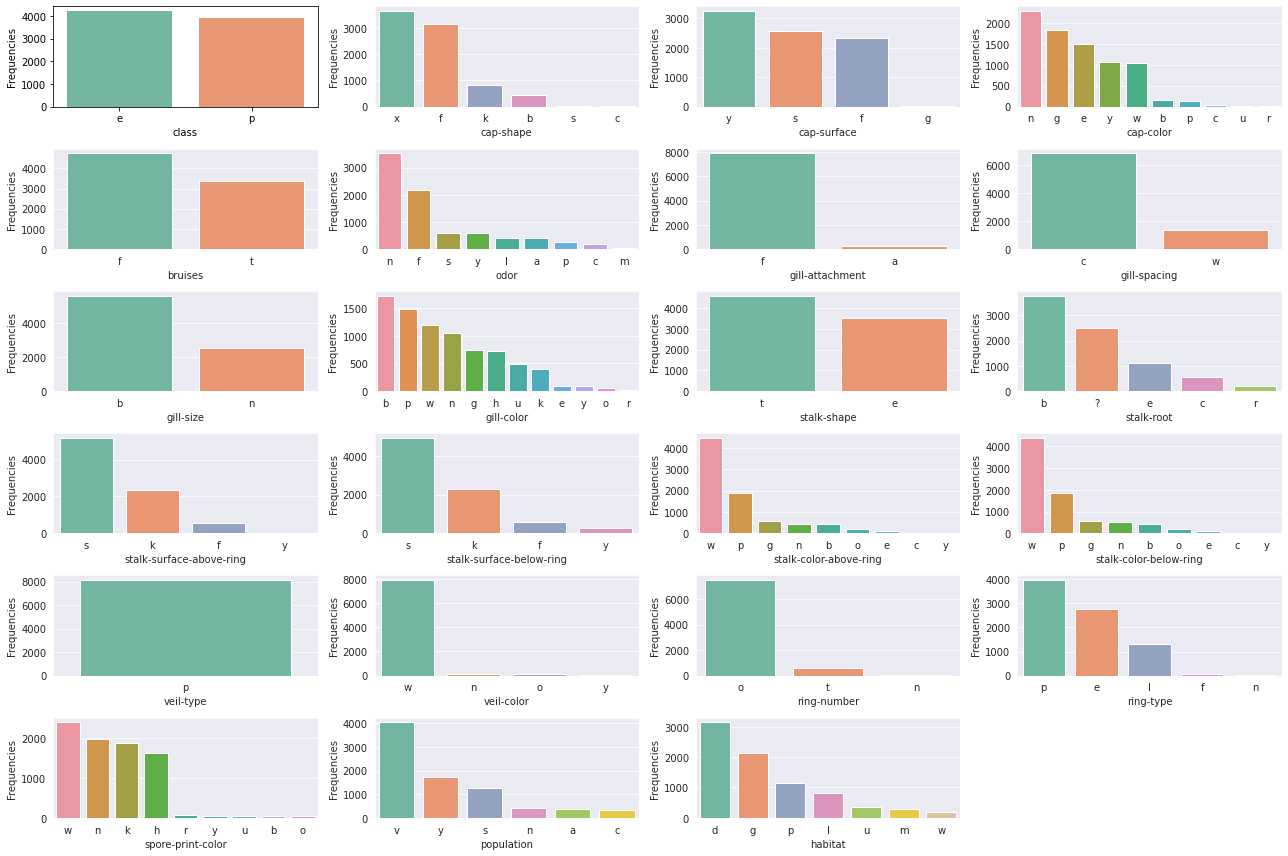

In [15]:
plt.figure(figsize=(18,12))
for i, col in enumerate(df_mushrooms.columns) :
    sns.set_palette(sns.color_palette("Set2"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = df_mushrooms, ax = ax, 
        order = df_mushrooms[col].value_counts(ascending=False).index
    )
    sns.set_style('darkgrid')
    plt.xticks(rotation=0)
    plt.ylabel("Frequencies")
    plt.tight_layout()
plt.show()

<H3>Target<H3>
<H4>poisonous=p, edible=e<H4>

Text(0.5, 1.0, 'Target')

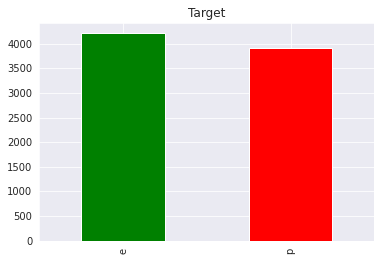

In [16]:
df_mushrooms['class'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title('Target')

<H4>Data Preparation<H4>

In [17]:
df_mushrooms['class'] = df_mushrooms['class'].replace({'p':1, 'e':0})
df_mushrooms.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


In [18]:
df_mushrooms = df_mushrooms.rename(columns={'class':'poisonous'})
df_mushrooms.head(2)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


#Missing Values
<H4>stalk-root<H4>
<H4>'['e'  'c'  'b'  'r'  '?']'<H4>

<H3><H3>
<img src="https://image.slidesharecdn.com/mushroomtutorial-111116143440-phpapp02/95/mushroom-tutorial-httprjdataminingweeblycom-12-728.jpg" alt="Stalk Root Shapes">

In [19]:
#There are maily 6 stalk root shapes, assuming: e as Equal, c as Club-Shaped, b as Bulbous, r as rooting,
###### A new value will be created 'w' for with cup and with rhizomorphs #######
df_mushrooms['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [20]:
df_mushrooms_unclean = df_mushrooms

In [21]:
df_mushrooms_unclean['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [22]:
df_mushrooms['stalk-root'] = df_mushrooms['stalk-root'].replace({'?' : 'w'})

In [23]:
df_mushrooms['stalk-root'].value_counts()

b    3776
w    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

# Features Encoding

In [24]:
# Dummy encode for binary columns (Unique Values = 2) 
# and One Hot Encode for +2 unique values(categorical columns)

binary_col = df_mushrooms.columns[df_mushrooms.nunique() == 2 ]
categorical_col = [col for col in df_mushrooms.columns if col not in binary_col]

dummy_binary_cols = pd.get_dummies( df_mushrooms[binary_col], drop_first=True, prefix_sep = "_bi_" )
one_hot_categorical_cols = pd.get_dummies( df_mushrooms[categorical_col], drop_first=False, prefix="categ_")
print(dummy_binary_cols.head(3))
print(dummy_binary_cols.shape)
print(one_hot_categorical_cols.head(3))
print(one_hot_categorical_cols.shape)

   poisonous  bruises_bi_t  ...  gill-size_bi_n  stalk-shape_bi_t
0          1             1  ...               1                 0
1          0             1  ...               0                 0
2          0             1  ...               0                 0

[3 rows x 6 columns]
(8124, 6)
   categ__b  categ__c  categ__f  ...  categ__p  categ__u  categ__w
0         0         0         0  ...         0         1         0
1         0         0         0  ...         0         0         0
2         1         0         0  ...         0         0         0

[3 rows x 107 columns]
(8124, 107)


In [25]:
df_model = pd.concat([dummy_binary_cols, one_hot_categorical_cols], axis=1)
print(df_model.head(3))
print(df_model.shape)

   poisonous  bruises_bi_t  gill-attachment_bi_f  ...  categ__p  categ__u  categ__w
0          1             1                     1  ...         0         1         0
1          0             1                     1  ...         0         0         0
2          0             1                     1  ...         0         0         0

[3 rows x 113 columns]
(8124, 113)


In [26]:
corr_matrix = df_model.corr()
corr_matrix

,poisonous,bruises_bi_t,gill-attachment_bi_f,gill-spacing_bi_w,gill-size_bi_n,stalk-shape_bi_t,categ__b,categ__c,categ__f,categ__k,categ__s,categ__x,categ__f,categ__g,categ__s,categ__y,categ__b,categ__c,categ__e,categ__g,categ__n,categ__p,categ__r,categ__u,categ__w,categ__y,categ__a,categ__c,categ__f,categ__l,categ__m,categ__n,categ__p,categ__s,categ__y,categ__b,categ__e,categ__g,categ__h,categ__k,...,categ__n,categ__o,categ__p,categ__w,categ__y,categ__p,categ__n,categ__o,categ__w,categ__y,categ__n,categ__o,categ__t,categ__e,categ__f,categ__l,categ__n,categ__p,categ__b,categ__h,categ__k,categ__n,categ__o,categ__r,categ__u,categ__w,categ__y,categ__a,categ__c,categ__n,categ__s,categ__v,categ__y,categ__d,categ__g,categ__l,categ__m,categ__p,categ__u,categ__w
poisonous,1.000000,-0.501530,0.129200,-0.348387,0.540024,-0.102019,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,0.095454,0.088677,0.067544,-0.030910,0.097112,-0.046456,-0.044360,0.034702,-0.042854,-0.042854,-0.133683,0.113014,-0.219529,0.161278,0.623842,-0.219529,0.069159,-0.785557,0.186984,0.286360,0.286360,0.538808,-0.105491,0.120285,0.150694,-0.149641,...,0.203966,-0.150087,0.230277,-0.214112,0.056426,NaN,-0.105491,-0.105491,0.140541,0.032545,0.069159,0.182101,-0.204600,0.223286,-0.074371,0.451619,0.069159,-0.540469,-0.074371,0.490229,-0.396832,-0.416645,-0.074371,0.098024,-0.074371,0.357384,-0.074371,-0.214871,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
bruises_bi_t,-0.501530,1.000000,0.137359,-0.299473,-0.369596,0.099364,0.115686,0.003803,0.045188,-0.229578,-0.053026,0.048557,-0.028808,0.026321,-0.104439,0.124401,0.172330,-0.035000,0.000426,-0.050501,-0.051746,0.038160,-0.037458,-0.037458,0.095555,-0.033564,0.269875,-0.131191,-0.344642,0.269875,-0.056257,0.285171,0.213915,-0.232938,-0.232938,-0.438292,0.129684,-0.138321,-0.181608,0.025677,...,-0.218691,-0.131191,-0.119769,0.153438,-0.045900,NaN,-0.092210,-0.092210,0.133964,-0.026474,-0.056257,-0.029480,0.044566,-0.506406,-0.065008,-0.367368,-0.056257,0.767036,-0.065008,-0.243244,0.335756,0.334734,-0.065008,0.112142,0.091427,-0.416877,-0.065008,-0.187820,0.073229,0.103639,0.072997,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507
gill-attachment_bi_f,0.129200,0.137359,1.000000,0.071489,0.108984,0.186485,-0.122896,0.003615,0.043740,-0.083575,0.010244,0.063156,0.102989,0.003615,-0.210358,0.104304,0.023671,-0.051393,0.065522,0.088146,-0.239772,0.021882,0.007236,0.007236,0.062415,0.063512,0.037070,0.025344,0.098032,0.037070,-0.199347,-0.157755,0.029383,0.044999,0.044999,0.084670,0.017813,0.052027,0.051261,0.037458,...,0.042247,-0.955097,0.089136,0.176364,0.008867,NaN,-0.671306,-0.671306,0.935238,0.005114,-0.199347,0.004504,0.046001,0.117362,0.012558,0.070969,-0.199347,-0.138778,-0.473272,0.081674,0.089136,0.005199,-0.473272,0.015404,0.012558,0.074456,-0.473272,0.036283,-0.407552,0.037070,0.069399,0.013080,0.084172,0.100905,0.097662,-0.436199,0.031453,0.065947,0.035483,0.025344
gill-spacing_bi_w,-0.348387,-0.299473,0.071489,1.000000,-0.108333,0.080895,0.039406,0.050573,-0.039154,-0.019591,-0.027598,0.033328,0.202414,0.050573,0.152145,-0.333229,-0.063773,0.076996,-0.208841,0.107765,-0.066117,0.022167,-0.019495,-0.019495,0.320419,-0.115760,-0.025662,0.143116,-0.264112,-0.025662,-0.029279,0.371333,-0.079162,-0.121234,-0.121234,-0.228112,-0.047991,-0.001668,0.086197,0.193146,...,-0.047746,-0.068279,-0.240145,0.367768,0.025418,NaN,-0.047991,-0.047991,0.052453,0.071539,-0.029279,-0.230729,0.244417,0.264962,-0.033834,-0.191199,-0.029279,-0.102263,-0.033834,-0.220039,0.103008,0.126615,-0.033834,-0.041500,0.175668,-0.024711,-0.033834,0.507534,-0.064994,0.122756,0.347365,-0.308043,-0.226770,-0.217237,0.537841,-0.077632,-0.084739,-0.177670,-0.095595,-0.068279
gill-size_bi_n,0.540024,-0.369596,0.108984,-0.108333,1.000000,0.214576,-0.148449,0.033174,-0.075766,0.306333,0.093993,-0.056995,-0.257889,0.033174

In [110]:
poisonous_corr = corr_matrix['poisonous']
poisonous_corr = poisonous_corr.sort_values(kind='quicksort', ascending=False)
poisonous_corr

poisonous         1.000000
categ__f          0.623842
categ__k          0.587658
categ__k          0.573524
gill-size_bi_n    0.540024
                    ...   
categ__s         -0.491314
bruises_bi_t     -0.501530
categ__p         -0.540469
categ__n         -0.785557
categ__p               NaN
Name: poisonous, Length: 113, dtype: float64

# Bagging & Boosting Model

In [29]:
x = df_model.drop(['poisonous'], axis=1)
y = df_model['poisonous']
print(x.shape)
print(y.shape)

(8124, 112)
(8124,)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=99)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4874, 112)
(3250, 112)
(4874,)
(3250,)


<H3>KNeighbors Classifier<H3>

In [41]:
#KNeighborsClassifier
knn_class = KNeighborsClassifier().fit(x_train, y_train)
knn_pred = knn_class.predict(x_test)
knn_recall_score = recall_score(knn_pred, y_test)
knn_roc_auc_score = roc_auc_score(knn_pred, y_test)
knn_classification_report = classification_report(knn_pred, y_test)
print("knn_recall_score :",knn_recall_score)
print("knn_roc_score :",knn_roc_auc_score)
print(knn_classification_report)

knn_recall_score : 1.0
knn_roc_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



<H3>Bagging Classifier<H3>

In [42]:
#BaggingClassifier
bagg_class = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50).fit(x_train, y_train)
bagg_pred = bagg_class.predict(x_test)
bagg_recall_score = recall_score(bagg_pred, y_test)
bagg_roc_auc_score = roc_auc_score(bagg_pred, y_test)
bagg_classification_report = classification_report(bagg_pred, y_test)
print("knn_recall_score :",bagg_recall_score)
print("knn_roc_score :",bagg_roc_auc_score)
print(bagg_classification_report)

knn_recall_score : 1.0
knn_roc_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



<H3>Gradient Boosting Classifier<H3>

In [60]:
#Gradient Boosting Classifier
boost = GradientBoostingClassifier(n_estimators=1).fit(x_train, y_train)
boost_pred = boost.predict(x_test)
#Sensibilidad Recall, verdaderos positivos
boost_recall_score = recall_score(boost_pred, y_test)
#Tasa Falsos Positivos
boost_roc_auc_score = roc_auc_score(boost_pred, y_test)
boost_classification_report = classification_report(boost_pred, y_test)
print("knn_recall_score :",boost_recall_score)
print("knn_roc_score :",boost_roc_auc_score)
print(boost_classification_report)

knn_recall_score : 0.9792713567839196
knn_roc_score : 0.9863184286935279
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1658
           1       0.99      0.98      0.99      1592

    accuracy                           0.99      3250
   macro avg       0.99      0.99      0.99      3250
weighted avg       0.99      0.99      0.99      3250



<H4>Confusion Matrix<H4>

In [57]:
#Confusion Matrix Gradient Boosting Classifier
boost_cnf_matrix = confusion_matrix(y_true=y_test, y_pred=boost_pred)
print(boost_cnf_matrix)

array([[1647,   33],
       [  11, 1559]])

[[1647   33]
 [  11 1559]]


Text(0.5, 257.44, 'Y Predicted')

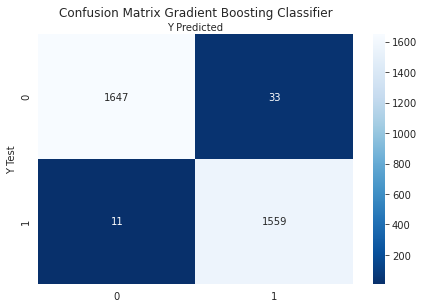

In [59]:
#Confusion Matrix Gradient Boosting Classifier
boost_cnf_matrix = confusion_matrix(y_true=y_test, y_pred=boost_pred)
print(boost_cnf_matrix)

#Confusion Matrix - Graphic

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(boost_cnf_matrix), annot=True, cmap= 'Blues_r', fmt= 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix Gradient Boosting Classifier', y = 1.1)
plt.ylabel('Y Test')
plt.xlabel('Y Predicted')

<H4>ROC Curve<H4>

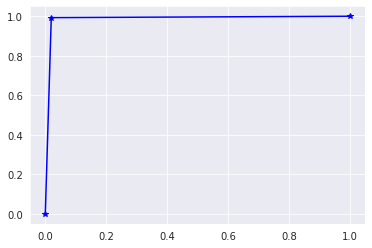

In [78]:
#False Positive rate
#True Positive rate
boost_fpr, boost_tpr, _ = roc_curve(y_test, boost_pred)
plt.plot(boost_fpr, boost_tpr, marker='*', color='b')

In [90]:
print(len(boost.feature_importances_))
print(len(x.columns))

112
112


In [94]:
features_array = np.array(x.columns)
features_importances_array = boost.feature_importances_
dict_feature_importances = { "model_features" : features_array,
                             "feature_weights" :  features_importances_array}
df_boost_features = pd.DataFrame(dict_feature_importances)
df_boost_features = df_boost_features.sort_values('feature_weights', ascending=False)
df_boost_features

,model_features,feature_weights
30,categ__n,0.650075
47,categ__c,0.192962
49,categ__r,0.086959
95,categ__r,0.039138
83,categ__o,0.017997
...,...,...
34,categ__b,0.000000
33,categ__y,0.000000
32,categ__s,0.000000
31,categ__p,0.000000


<H3>Gradient Boosting Classifier - Parameters Optimization<H3>

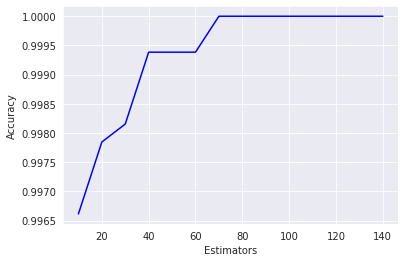

<Figure size 1440x1440 with 0 Axes>

0.9966153846153846
1.0


In [53]:
#Boosting Model's parameters optimization
estimators = range(10, 150, 10)
total_accuracy = []
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(x_train, y_train)
    boost_pred = boost.predict(x_test)

    total_accuracy.append(accuracy_score(y_test, boost_pred))
    
plt.plot(estimators, total_accuracy, color='b')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.figure(figsize=(20,20))
plt.show()

print(np.array(total_accuracy).min())
print(np.array(total_accuracy).max())

In [54]:
#Gradient Boosting Classifier with optimised parameters
boost_opt = GradientBoostingClassifier(n_estimators=75).fit(x_train, y_train)
boost_opt_pred = boost_opt.predict(x_test)
boost_opt_recall_score = recall_score(boost_opt_pred, y_test)
boost_opt_roc_auc_score = roc_auc_score(boost_opt_pred, y_test)
boost_opt_classification_report = classification_report(boost_opt_pred, y_test)
print("knn_recall_score :",boost_opt_recall_score)
print("knn_roc_score :",boost_opt_roc_auc_score)
print(boost_opt_classification_report)

knn_recall_score : 1.0
knn_roc_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



<H4>Boosting Classifier Model obtains 100% accuracy using 75 estimators, features are strongly related <H3>

<H4><H4>